# Segmentação de Clientes E-commerce

O objetivo deste projeto é realizar uma segmentação estratégica da base de clientes de um e-commerce, com foco em otimizar ações de CRM (Customer Relationship Management). 

A proposta é identificar diferentes perfis de consumo, avaliar o comportamento de compra, definir 'o que é um churn' e propor ações personalizadas para retenção, reativação e aumento de valor dos clientes.

A análise foi realizada com base em dados transacionais de um dos maiores e-commerces do Brasil, abrangendo pedidos, produtos, pagamentos, avaliações e perfis de clientes. O período analisado compreende de setembro de 2016 a outubro de 2018.

Por meio de técnicas de estatísticas e aprendizado de máquina, os clientes foram agrupados com base em seu histórico de compras, permitindo a criação de estratégias de comunicação mais eficientes.

### Importando Bibliotecas

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Importando Tabelas

In [2]:
customers = pd.read_csv('customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation = pd.read_csv('geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv('order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments = pd.read_csv('order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews = pd.read_csv('order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders = pd.read_csv('orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category = pd.read_csv('product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products = pd.read_csv('products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv('sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Preparando a Base

In [11]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

In [12]:
MAX_DATE = orders['order_approved_at'].max()
MAX_DATE

Timestamp('2018-09-03 17:40:06')

Para o cálculo de recência, ultizei a data máxima como a última data da base, comparando a última compra como referência das outras datas. Se colocasse data atual o intervalo sem compra dos clientes seria fora da realidade.

In [13]:
query = f"""
SELECT 
    customers.customer_unique_id, 
    COUNT(DISTINCT orders.order_id) AS total_orders,
    COUNT(DISTINCT order_item_id) AS total_item,
    SUM(DISTINCT payment_value) AS total_value,
    SUM(payment_value)/COUNT(orders.order_id) AS ticket,
    MAX(order_approved_at) AS last_order,
    MAX(order_purchase_timestamp) AS last_order_create,
    CAST(julianday('{MAX_DATE}') - julianday(MAX(order_approved_at)) AS INTEGER) AS days_since_order
FROM customers
JOIN orders ON orders.customer_id = customers.customer_id
JOIN order_payments ON order_payments.order_id = orders.order_id
JOIN order_items ON order_items.order_id = orders.order_id
WHERE order_approved_at is not null
GROUP BY customers.customer_unique_id
"""

orders_per_customer = ps.sqldf(query, locals())

In [14]:
orders_per_customer.head()

,customer_unique_id,total_orders,total_item,total_value,ticket,last_order,last_order_create,days_since_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,141.90,141.90,2018-05-10 11:11:18.000000,2018-05-10 10:56:27,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,27.19,27.19,2018-05-07 18:25:44.000000,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,1,1,86.22,86.22,2017-03-10 21:05:03.000000,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,43.62,43.62,2017-10-12 20:49:17.000000,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,1,1,196.89,196.89,2017-11-14 20:06:52.000000,2017-11-14 19:45:42,292


## Análise Exploratória dos Dados (AED)

In [15]:
orders_per_customer.describe()

,total_orders,total_item,total_value,ticket,days_since_order
count,95406.000000,95406.000000,95406.000000,95406.000000,95406.000000
mean,1.034013,1.144121,165.458380,158.530848,242.637643
std,0.211226,0.542732,227.062685,218.577907,153.119957
min,1.000000,1.000000,6.180000,1.856818,0.000000
25%,1.000000,1.000000,62.910000,60.835000,118.000000
50%,1.000000,1.000000,107.780000,103.790000,223.000000
75%,1.000000,1.000000,182.627500,175.247500,352.000000
max,16.000000,21.000000,13664.080000,13664.080000,699.000000


In [16]:
orders_per_customer[['total_orders', 'total_item', 'total_value']].sum()

total_orders       98651.00
total_item        109156.00
total_value     15785722.22
dtype: float64

In [19]:
frequencia = orders_per_customer['total_orders'].value_counts().sort_index()
frequencia

total_orders
1     92494
2      2672
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: count, dtype: int64

Alta concentração de clientes que compraram só uma vez.

In [20]:
orders_per_customer.isnull().sum()

customer_unique_id    0
total_orders          0
total_item            0
total_value           0
ticket                0
last_order            0
last_order_create     0
days_since_order      0
dtype: int64

Não há valores nulos na base.

In [21]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

orders['ano_mes'] = orders['order_approved_at'].dt.to_period('M').astype(str)

pedidos_mensais = orders.groupby('ano_mes')['order_id'].count().reset_index()

In [22]:
pedidos_mensais.head()

,ano_mes,order_id
0,2016-09,1
1,2016-10,320
2,2016-12,1
3,2017-01,760
4,2017-02,1765


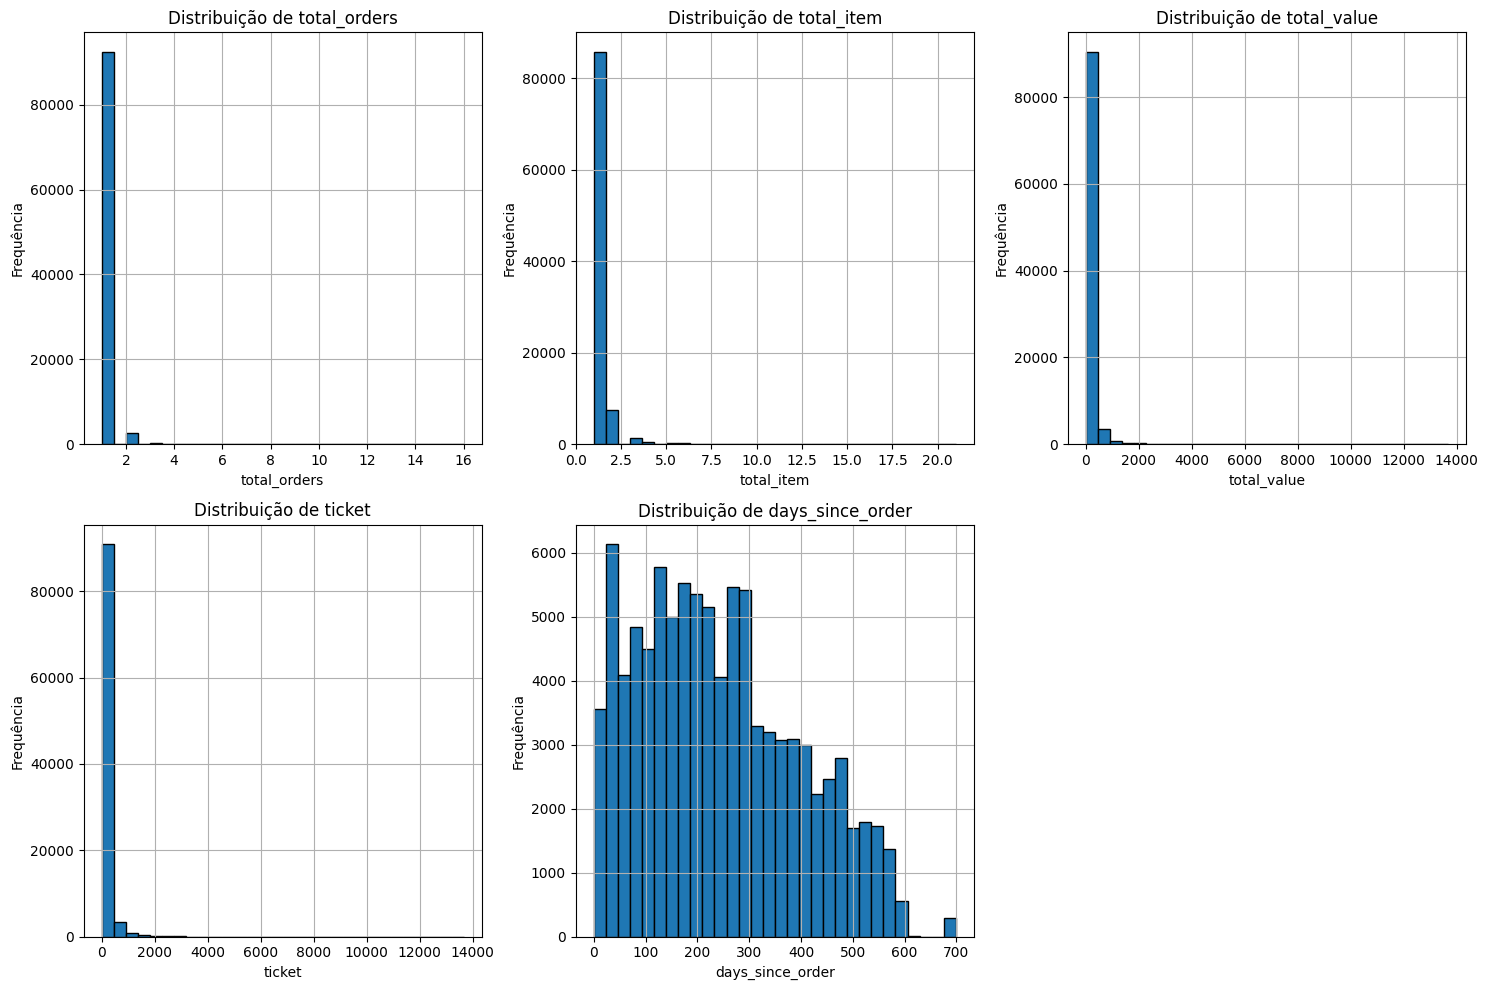

In [23]:
cols = ['total_orders', 'total_item', 'total_value', 'ticket', 'days_since_order']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    orders_per_customer[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


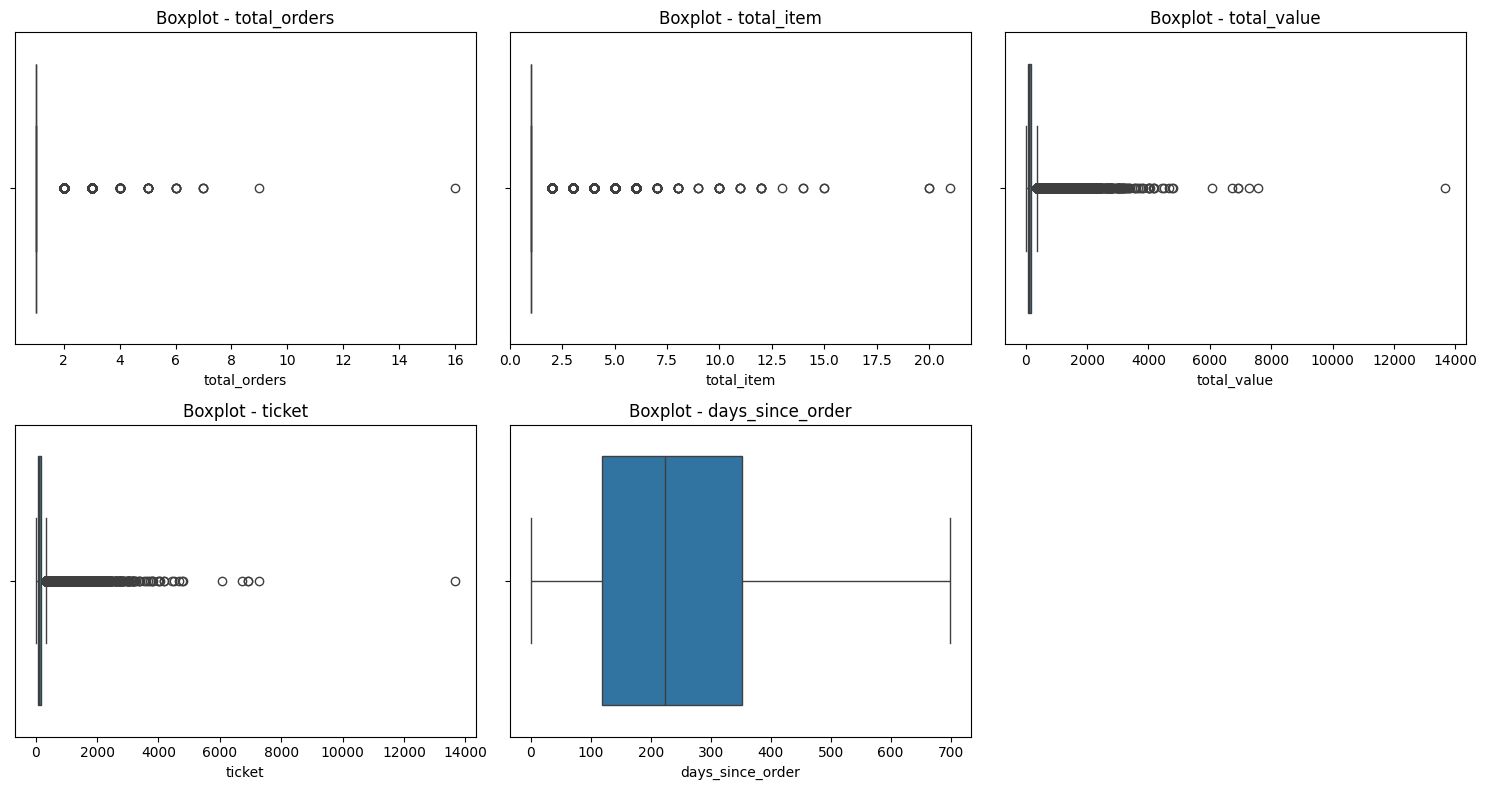

In [24]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=orders_per_customer[col])
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

A análise mostra que a maior parte dos clientes fez apenas uma compra, com poucos itens e baixo valor — um padrão comum em e-commerces, que reforça o desafio da fidelização. Ainda assim, encontramos clientes que, mesmo comprando uma única vez, gastaram valores altos ou adquiriram muitos produtos, revelando perfis com grande potencial de valor.

Já em relação à recência, boa parte dos clientes comprou recentemente, mas há um volume expressivo de inativos há mais de 300 dias, o que abre espaço para estratégias de reengajamento.

Esses padrões indicam que, embora o perfil geral seja de baixa recorrência, há oportunidades claras de retenção, reativação e valorização de clientes estratégicos.

## Transformação Logarítmica nas Variáveis
Para preparar os dados para a clusterização, aplicamos a transformação logarítmica (log1p) em algumas variáveis. Isso é especialmente útil para corrigir assimetrias (skewness) e reduzir o impacto de outliers moderados, comuns em variáveis financeiras.

Nesse caso, as variáveis ```total_value```, ```,ticket```, e ```,total_item```, apresentaram distribuições com cauda longa à direita — ou seja, a maioria dos clientes tem valores baixos, mas há uma minoria com valores muito altos. Aplicar log ajuda a suavizar essas diferenças, tornando os dados mais adequados para algoritmos baseados em distância, como o K-Means.

Já a variável ```,total_orders```, não passou por transformação logarítmica, pois seus valores são concentrados em números baixos (como 1, 2, 3...). Nesses casos, a aplicação do log não altera significativamente a distribuição e pode até dificultar a interpretação. Por isso, optamos apenas por padronizá-la com StandardScaler junto das demais.

In [25]:
orders_per_customer['log_total_value'] = np.log1p(orders_per_customer['total_value'])
orders_per_customer['log_ticket'] = np.log1p(orders_per_customer['ticket'])
orders_per_customer['log_total_item'] = np.log1p(orders_per_customer['total_item'])

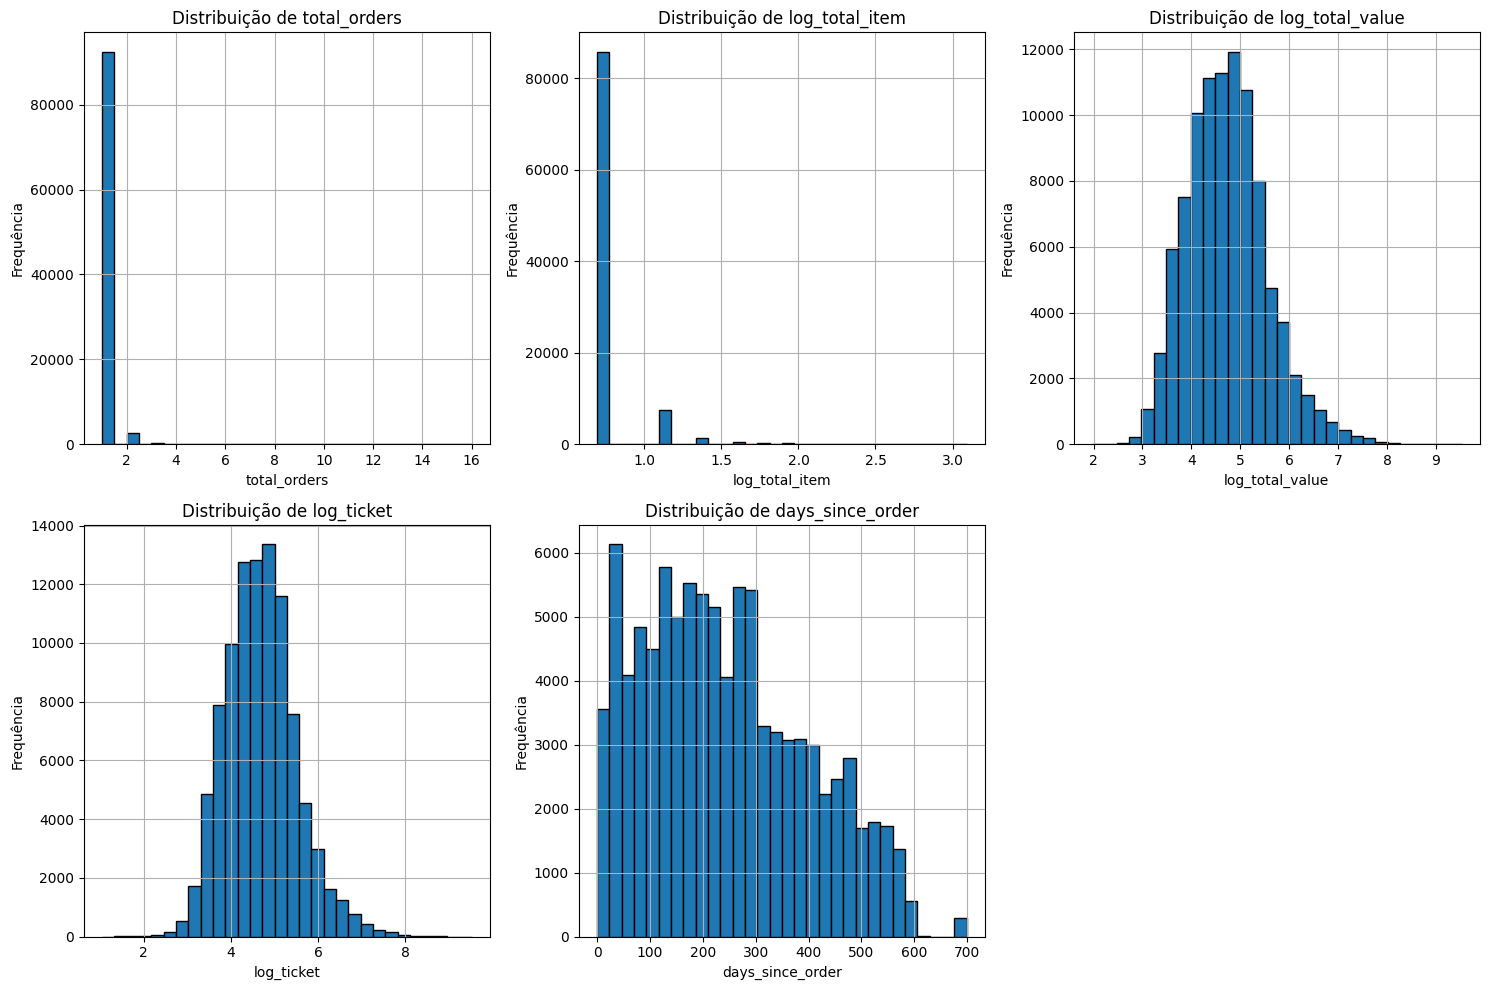

In [26]:
cols = ['total_orders', 'log_total_item', 'log_total_value', 'log_ticket', 'days_since_order']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    orders_per_customer[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

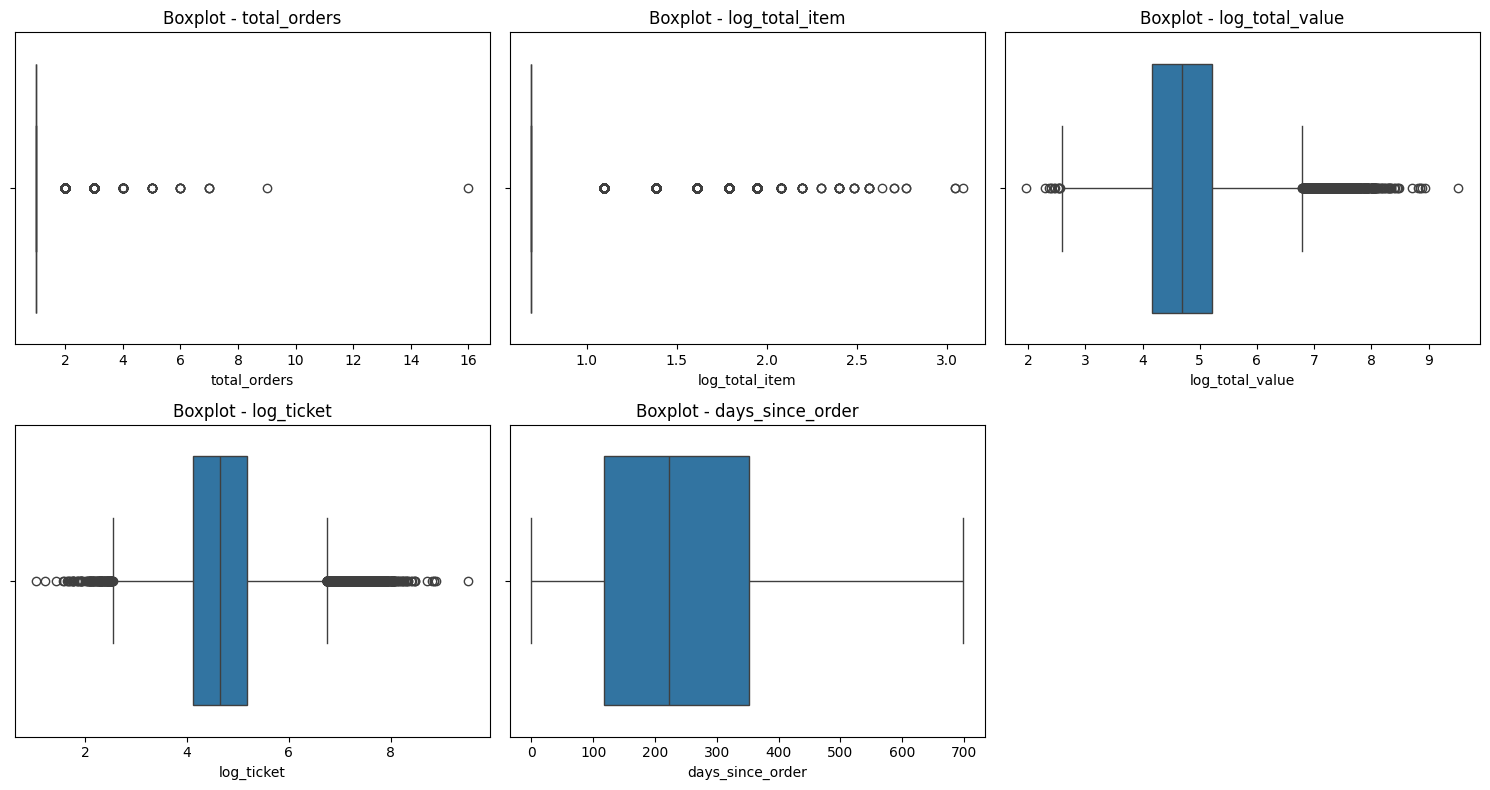

In [27]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=orders_per_customer[col])
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

Após aplicar a transformação logarítmica nas variáveis, as distribuições ficaram mais equilibradas e menos impactadas por outliers. Isso é essencial para garantir que o modelo de clusterização trate todas as variáveis com o mesmo peso.

Variáveis como ```total_value``` e ```ticket``` apresentavam grande assimetria, mas após o log passaram a ter um comportamento muito mais estável e próximo do ideal. Já total_orders e ```days_since_order``` foram mantidas como estavam, pois sua distribuição já era suficientemente concentrada ou equilibrada.

Essas transformações tornaram os dados mais comparáveis entre si e mais adequados para o uso do K-Means, permitindo uma segmentação mais justa e eficiente dos clientes.

## Definindo Churn

count    2912.000000
mean      225.281937
std       144.394512
min         0.000000
25%       110.000000
50%       204.500000
75%       324.000000
max       696.000000
Name: days_since_order, dtype: float64


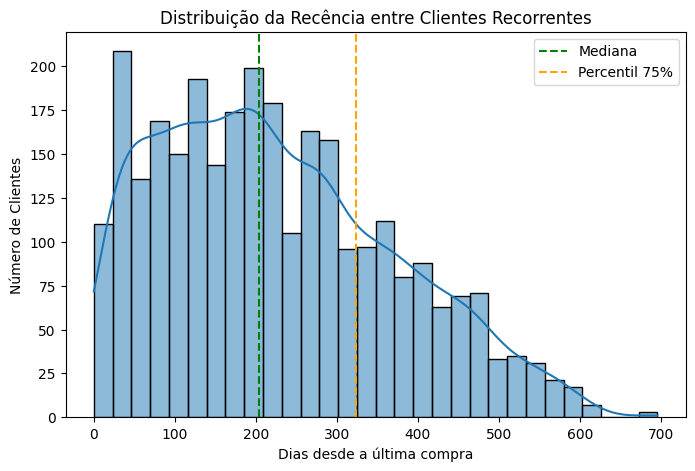

In [28]:
clientes_recorrentes = orders_per_customer[orders_per_customer['total_orders'] > 1]

recencia_recorrentes = clientes_recorrentes['days_since_order']

print(recencia_recorrentes.describe())

plt.figure(figsize=(8,5))
sns.histplot(recencia_recorrentes, bins=30, kde=True)
plt.axvline(recencia_recorrentes.median(), color='green', linestyle='--', label='Mediana')
plt.axvline(recencia_recorrentes.quantile(0.75), color='orange', linestyle='--', label='Percentil 75%')
plt.title('Distribuição da Recência entre Clientes Recorrentes')
plt.xlabel('Dias desde a última compra')
plt.ylabel('Número de Clientes')
plt.legend()
plt.show()



Com base na análise da recência entre clientes que realizaram mais de uma compra, foi definido como ponto de corte 324 dias sem nova compra, valor correspondente ao percentil 75%. Ou seja, clientes acima desse intervalo estão fora do comportamento típico de recompra da maioria.

In [29]:
churn_limite = 324
orders_per_customer['is_churn'] = orders_per_customer['days_since_order'] > churn_limite

In [30]:
churn_summary = orders_per_customer['is_churn'].agg(['sum', 'count'])
churn_summary['% Churn'] = (churn_summary['sum'] / churn_summary['count']) * 100
churn_summary

sum        27555.000000
count      95406.000000
% Churn       28.881831
Name: is_churn, dtype: float64

Temos que 29% da base está em churn, ou seja, a mais de 324 sem comprar.

## Segmentação (k-means)

In [33]:
final_df = orders_per_customer[['total_orders', 'log_total_item', 'log_total_value', 'log_ticket', 'days_since_order']]
final_df.head()

,total_orders,log_total_item,log_total_value,log_ticket,days_since_order
0,1,0.693147,4.962145,4.962145,116
1,1,0.693147,3.338967,3.338967,118
2,1,0.693147,4.468434,4.468434,541
3,1,0.693147,3.798182,3.798182,325
4,1,0.693147,5.287711,5.287711,292


In [34]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(final_df)

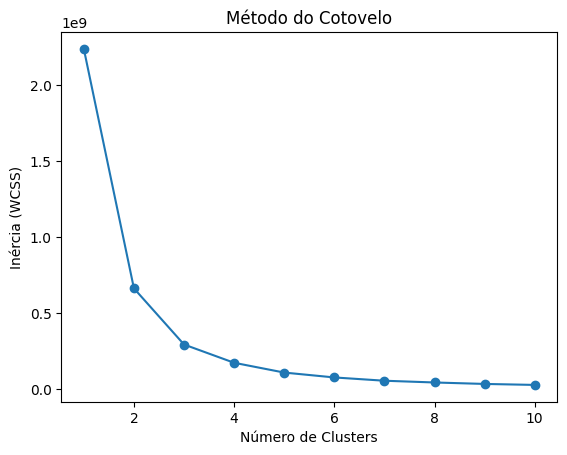

In [35]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia (WCSS)')
plt.show()

Com base na análise do método do cotovelo, identificamos que o ponto de inflexão ocorre em k = 3. Esse é o número de clusters onde há uma redução substancial da variabilidade interna (inércia), sem perda excessiva de simplicidade. Portanto, a escolha foi segmentar a base em 3 grupos de clientes distintos, que serão analisados em seguida quanto ao seu comportamento de compra, valor gerado e nível de engajamento.

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['cluster'] = kmeans.fit_predict(features_scaled)

/var/folders/wt/_hm9npcx6xnbt_qw03pfvm940000gn/T/ipykernel_45767/691599105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cluster'] = kmeans.fit_predict(features_scaled)


In [39]:
final_df.head()

,total_orders,log_total_item,log_total_value,log_ticket,days_since_order,cluster
0,1,0.693147,4.962145,4.962145,116,1
1,1,0.693147,3.338967,3.338967,118,1
2,1,0.693147,4.468434,4.468434,541,2
3,1,0.693147,3.798182,3.798182,325,2
4,1,0.693147,5.287711,5.287711,292,0


In [40]:
orders_per_customer['cluster'] = final_df['cluster'].values

In [41]:
tabela_cluster = orders_per_customer['cluster'].value_counts(normalize=False).reset_index()
tabela_cluster.columns = ['cluster', 'Quantidade de Clientes']
tabela_cluster['Percentual (%)'] = (tabela_cluster['Quantidade de Clientes'] / tabela_cluster['Quantidade de Clientes'].sum() * 100).round(2)

tabela_simples = tabela_cluster[['cluster', 'Quantidade de Clientes', 'Percentual (%)']]
tabela_simples

,cluster,Quantidade de Clientes,Percentual (%)
0,1,38867,40.74
1,0,30030,31.48
2,2,26509,27.79


In [42]:
orders_per_customer.groupby('cluster')[['total_orders', 'total_item', 'total_value', 'ticket', 'days_since_order']].mean()

,total_orders,total_item,total_value,ticket,days_since_order
cluster,,,,,
0,1.078222,1.383616,341.227407,324.571113,211.844589
1,1.011938,1.027298,74.847821,72.794549,146.240693
2,1.016296,1.044098,99.194723,96.141605,418.856124


In [43]:
orders_per_customer.query('cluster == 0').describe()

,total_orders,total_item,total_value,ticket,days_since_order,log_total_value,log_ticket,log_total_item,cluster
count,30030.000000,30030.000000,30030.000000,30030.000000,30030.000000,30030.000000,30030.000000,30030.000000,30030.0
mean,1.078222,1.383616,341.227407,324.571113,211.844589,5.616499,5.557989,0.826848,0.0
std,0.326811,0.880648,338.438160,327.937347,131.703860,0.583680,0.599906,0.260959,0.0
min,1.000000,1.000000,58.450000,31.408000,0.000000,4.085136,3.478405,0.693147,0.0
25%,1.000000,1.000000,179.320000,172.620000,112.000000,5.194733,5.156869,0.693147,0.0
50%,1.000000,1.000000,235.920000,224.685000,195.000000,5.467723,5.419140,0.693147,0.0
75%,1.000000,1.000000,363.987500,346.380000,287.000000,5.899863,5.850419,0.693147,0.0
max,16.000000,21.000000,13664.080000,13664.080000,698.000000,9.522599,9.522599,3.091042,0.0


In [44]:
orders_per_customer.query('cluster == 1').describe()

,total_orders,total_item,total_value,ticket,days_since_order,log_total_value,log_ticket,log_total_item,cluster
count,38867.000000,38867.000000,38867.000000,38867.000000,38867.000000,38867.000000,38867.000000,38867.000000,38867.0
mean,1.011938,1.027298,74.847821,72.794549,146.240693,4.214252,4.181296,0.704108,1.0
std,0.111184,0.168694,34.984766,34.465174,84.257653,0.494217,0.510626,0.067111,0.0
min,1.000000,1.000000,6.180000,1.856818,5.000000,1.971299,1.049708,0.693147,1.0
25%,1.000000,1.000000,46.010000,44.490000,73.000000,3.850360,3.817493,0.693147,1.0
50%,1.000000,1.000000,68.430000,66.990000,145.000000,4.240319,4.219361,0.693147,1.0
75%,1.000000,1.000000,99.900000,97.650000,214.000000,4.614130,4.591578,0.693147,1.0
max,3.000000,4.000000,265.600000,161.970000,418.000000,5.585749,5.093566,1.609438,1.0


In [45]:
orders_per_customer.query('cluster == 2').describe()

,total_orders,total_item,total_value,ticket,days_since_order,log_total_value,log_ticket,log_total_item,cluster
count,26509.000000,26509.000000,26509.000000,26509.000000,26509.000000,26509.000000,26509.000000,26509.000000,26509.0
mean,1.016296,1.044098,99.194723,96.141605,418.856124,4.476095,4.439110,0.710872,2.0
std,0.134979,0.211829,50.819939,49.796951,92.581966,0.527468,0.543883,0.084461,0.0
min,1.000000,1.000000,11.920000,2.410769,242.000000,2.558776,1.226938,0.693147,2.0
25%,1.000000,1.000000,60.860000,58.100000,346.000000,4.124874,4.079231,0.693147,2.0
50%,1.000000,1.000000,90.980000,87.360000,413.000000,4.521571,4.481419,0.693147,2.0
75%,1.000000,1.000000,129.780000,126.330000,487.000000,4.873517,4.846782,0.693147,2.0
max,6.000000,4.000000,521.070000,449.650000,699.000000,6.257802,6.110691,1.609438,2.0


A clusterização via K-Means identificou três perfis distintos de clientes, com base em comportamento de compra, valor e recência:

**Cluster 0**\
Reúne os clientes de maior valor, com alto ticket médio e bom volume de itens por pedido. Apesar de não estarem entre os mais recentes, são altamente estratégicos e devem ser o foco de ações de fidelização e retenção. (Alta Receita)

**Cluster 1**\
É composto por clientes recentes, porém com baixo valor de compra. Representam um público com potencial de crescimento e são ideais para estratégias de engajamento e estímulo à recorrência. (Baixo Valor Recente)

**Cluster 2**\
Concentra os clientes inativos, com longo tempo sem comprar, apesar de apresentarem um ticket intermediário. Para esse grupo, campanhas de reativação personalizadas são essenciais para recuperar o relacionamento e evitar perda definitiva. (Inativos Estratégicos)


In [46]:
orders_per_customer.head()

,customer_unique_id,total_orders,total_item,total_value,ticket,last_order,last_order_create,days_since_order,log_total_value,log_ticket,log_total_item,is_churn,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,141.90,141.90,2018-05-10 11:11:18.000000,2018-05-10 10:56:27,116,4.962145,4.962145,0.693147,False,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,27.19,27.19,2018-05-07 18:25:44.000000,2018-05-07 11:11:27,118,3.338967,3.338967,0.693147,False,1
2,0000f46a3911fa3c0805444483337064,1,1,86.22,86.22,2017-03-10 21:05:03.000000,2017-03-10 21:05:03,541,4.468434,4.468434,0.693147,True,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,43.62,43.62,2017-10-12 20:49:17.000000,2017-10-12 20:29:41,325,3.798182,3.798182,0.693147,True,2
4,0004aac84e0df4da2b147fca70cf8255,1,1,196.89,196.89,2017-11-14 20:06:52.000000,2017-11-14 19:45:42,292,5.287711,5.287711,0.693147,False,0


## Insights

Os clientes mais valiosos não são necessariamente os que compram com mais frequência ou recentemente, mas sim aqueles que geram mais valor por transação. No modelo de segmentação, esses consumidores estão concentrados no Cluster 0, com ticket médio de R$ 324, valor total médio de R$ 341 e uma média de 1,38 itens por pedido.

Apesar de representarem apenas 31% da base, esses clientes concentram uma fatia significativa do faturamento do e-commerce, sendo essenciais para a geração de receita. Suas compras estão concentradas em categorias como decoração, móveis e tecnologia, o que revela um perfil com foco em produtos de maior valor agregado. Além disso, a forma de pagamento mais comum é à vista, indicando menor dependência de parcelamento e maior poder de compra.

No entanto, esse grupo também exige atenção: mais de 5.500 clientes já estão em churn, o que reforça a importância de estratégias de fidelização. Ações como cashback, programas VIP e acesso antecipado a ofertas podem ser decisivas para manter esse público engajado e aumentar seu valor ao longo do tempo.

In [48]:
cluster_summary = orders_per_customer.groupby('cluster').agg({
    'total_orders': 'mean',
    'total_item': 'mean',
    'total_value': 'mean',
    'ticket': 'mean',
    'days_since_order': 'mean',
    'is_churn': 'mean'
}).rename(columns={
    'total_orders': 'Avg Orders',
    'total_item': 'Avg Items',
    'total_value': 'Avg Value',
    'ticket': 'Avg Ticket',
    'days_since_order': 'Avg Recency (days)',
    'is_churn': '% Churn'
})

cluster_summary['% Churn'] = (cluster_summary['% Churn'] * 100).round(2)

cluster_summary = cluster_summary.round(2)

cluster_summary

,Avg Orders,Avg Items,Avg Value,Avg Ticket,Avg Recency (days),% Churn
cluster,,,,,,
0,1.08,1.38,341.23,324.57,211.84,18.59
1,1.01,1.03,74.85,72.79,146.24,0.59
2,1.02,1.04,99.19,96.14,418.86,82.02


#### Cluster 0 – Clientes de Alto Valor com Risco Moderado
Os clientes do Cluster 0 são os mais valiosos do e-commerce. Apresentam o maior ticket médio (R$324,57) e também o maior valor total por cliente (R$341,23), o que indica que, mesmo comprando poucas vezes, geram grande receita por pedido. Além disso, costumam comprar uma média de 1,38 itens por transação. A recência média desses clientes é de 211 dias — um tempo considerável sem realizar novas compras — e 18,6% deles já são considerados churn. Isso mostra que, embora tenham alto valor, estão em risco de abandono. Por isso, é essencial priorizar esse grupo com estratégias de fidelização, como programas de benefícios, cupons exclusivos, ofertas antecipadas e ações que os façam se sentir valorizados e especiais.

### Cluster 1 – Clientes Recentes e de Baixo Valor
O Cluster 1 representa clientes mais recentes, com a menor recência média (146 dias) e o menor percentual de churn (apenas 0,59%). No entanto, eles ainda possuem baixo engajamento financeiro, com ticket médio de R$72,79 e valor total de apenas R$74,85. Compram em média um único item por vez. Esse grupo está em um estágio inicial do relacionamento com a marca e representa uma boa oportunidade para educação e crescimento de valor, por meio de ações como cross-sell, kits promocionais e benefícios progressivos que incentivem a aumentar o volume por pedido ou a frequência de compra.



### Cluster 2 – Clientes com Alto Risco de Churn
O Cluster 2 é o grupo com maior risco de perda. A recência média desses clientes é de 418 dias, e 82% deles já são classificados como churn. Apesar disso, eles não são clientes de baixo valor: possuem um ticket médio de R$96,14 e um valor total médio de R$99,19. Ou seja, são clientes que, quando ativos, representavam um bom potencial de receita. Por isso, esse grupo não deve ser ignorado. Ele deve ser o foco de estratégias de reativação, com mensagens personalizadas, ofertas exclusivas de retorno, campanhas de “sentimos sua falta” e ações baseadas em seu histórico de categorias ou produtos comprados.


### Mapa de calor

Foi utilizando a data da última compra de cada cliente

In [49]:
orders_per_customer['last_order_create'] = pd.to_datetime(orders_per_customer['last_order_create'])
orders_per_customer['day_of_week'] = orders_per_customer['last_order_create'].dt.day_name()
orders_per_customer['hour'] = orders_per_customer['last_order_create'].dt.hour

In [50]:
comportamento_tempo = orders_per_customer.groupby(['cluster', 'day_of_week', 'hour']).size().reset_index(name='total_pedidos')

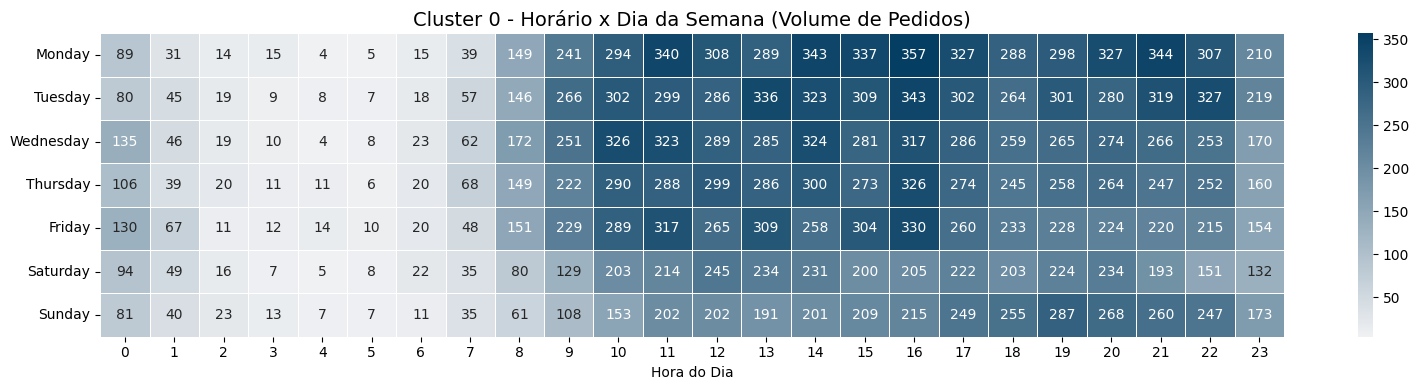

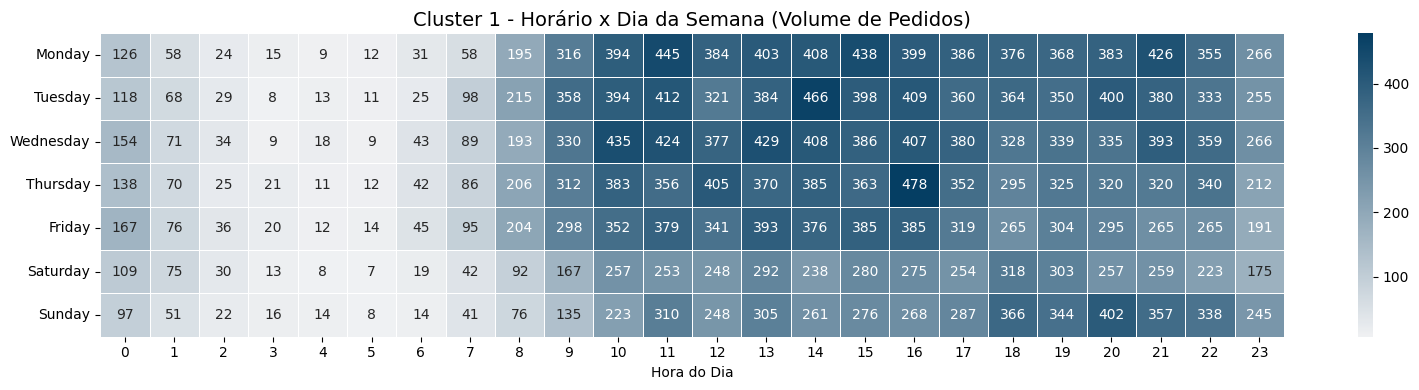

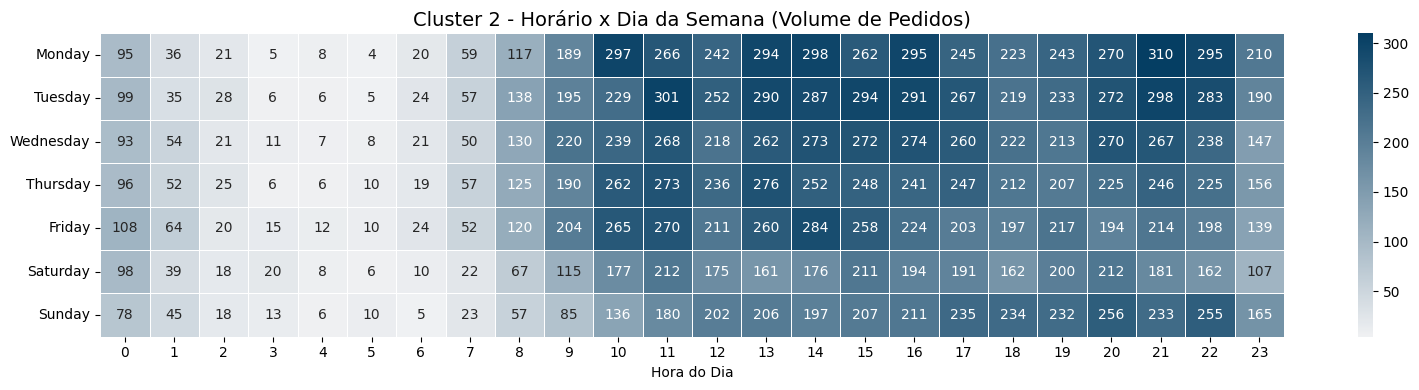

In [53]:
for cluster_id in sorted(orders_per_customer['cluster'].unique()):
    plt.figure(figsize=(16, 4))
    
    pivot = comportamento_tempo[comportamento_tempo['cluster'] == cluster_id] \
        .pivot(index='day_of_week', columns='hour', values='total_pedidos') \
        .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # ordena os dias
    
    sns.heatmap(pivot, cmap=sns.light_palette("#053e63", as_cmap=True), annot=True, fmt='g', linewidths=0.5, linecolor='white')
    
    plt.title(f'Cluster {cluster_id} - Horário x Dia da Semana (Volume de Pedidos)', fontsize=14)
    plt.xlabel('Hora do Dia')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

### Top Produtos

In [56]:
merged = (
    orders
    .merge(customers, on='customer_id', how='left')
    .merge(order_items, on='order_id', how='left')
    .merge(products, on='product_id', how='left')
    .merge(orders_per_customer[['customer_unique_id', 'cluster']], on='customer_unique_id', how='left')
)

ranking_categorias = (
    merged
    .groupby(['cluster', 'product_category_name'])
    .size()
    .reset_index(name='quantidade')
)

In [57]:
totais_por_cluster = ranking_categorias.groupby('cluster')['quantidade'].sum().reset_index()
totais_por_cluster.columns = ['cluster', 'total_cluster']

In [58]:
ranking_categorias = ranking_categorias.merge(totais_por_cluster, on='cluster')
ranking_categorias['% dentro do cluster'] = (ranking_categorias['quantidade'] / ranking_categorias['total_cluster'] * 100).round(2)

In [59]:
top_5_categorias = ranking_categorias.sort_values(['cluster', 'quantidade'], ascending=[True, False]) \
                                     .groupby('cluster').head(5) \
                                     .reset_index(drop=True)

top_5_categorias


,cluster,product_category_name,quantidade,total_cluster,% dentro do cluster
0,0.0,cama_mesa_banho,4449,43569,10.21
1,0.0,moveis_decoracao,3980,43569,9.13
2,0.0,informatica_acessorios,3465,43569,7.95
3,0.0,beleza_saude,3460,43569,7.94
4,0.0,esporte_lazer,3269,43569,7.50
5,1.0,beleza_saude,3957,39889,9.92
6,1.0,cama_mesa_banho,3716,39889,9.32
7,1.0,esporte_lazer,2956,39889,7.41
8,1.0,informatica_acessorios,2754,39889,6.90
9,1.0,utilidades_domesticas,2603,39889,6.53
